### Simulations

Non-Stacked


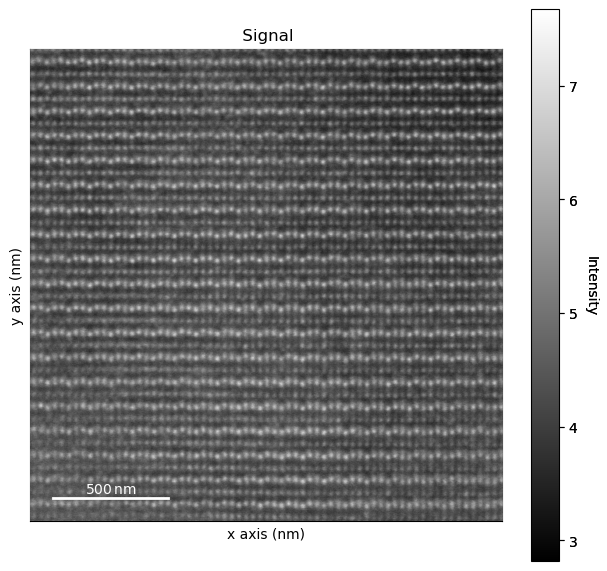

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
import sys
sys.path.append('../..')
import util.crop

stack_num = 0 # The index of stacked image

# s_load = hs.load('../../data/images/Jaume LFO EELS/EEL SI 22 13/Integrated Shifted Spectrum Image adf.dm3')
s_load = hs.load('../../data/images/Jaume LFO/HAADF_03.dm3')

if len(s_load.data.shape) == 2: # Non-stacked
    print("Non-Stacked")
    s = s_load
else: # Stacked, where s_load.data.shape = 3
    print("Stacked")
    s = s_load.inav[stack_num]

# Plot the image in pixels. We can plot in nanometers by simply doing s.plot().
import copy
s_copy = copy.deepcopy(s)
for ax in s_copy.axes_manager.signal_axes:
    ax.scale = 1.0
    ax.offset = 0.0

plt.close()
s_copy.plot()

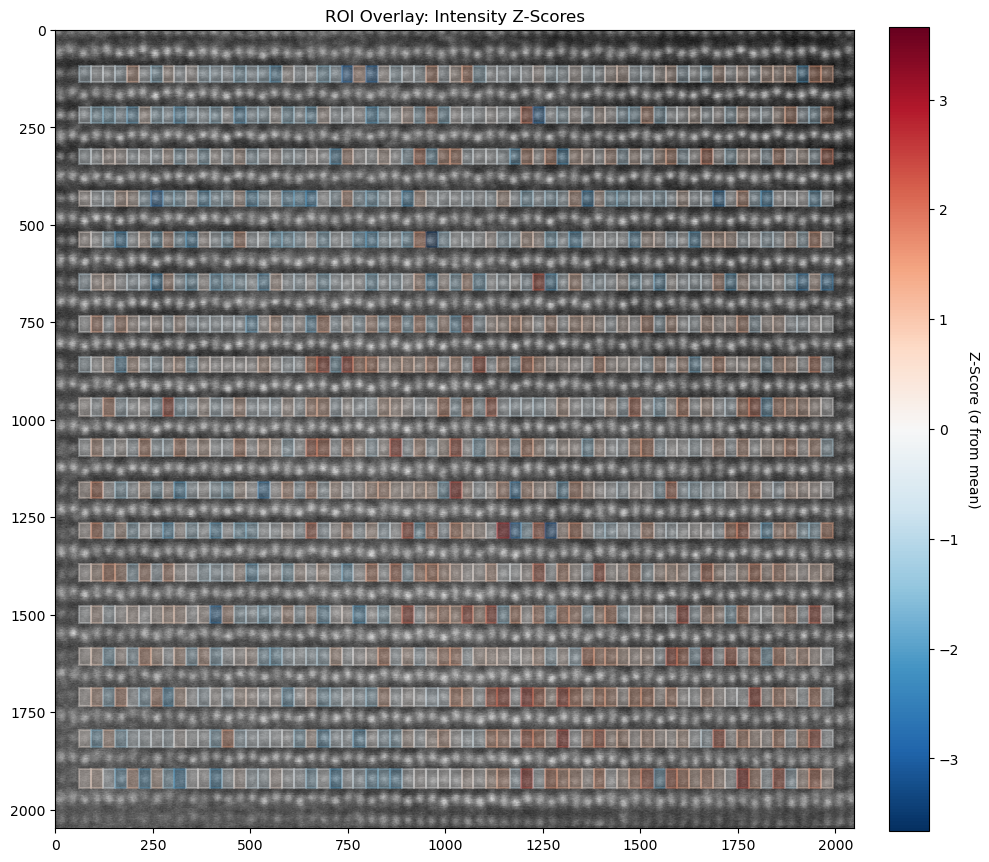

In [2]:
# left_bound = 0 # TUNE THIS
# right_bound = 185 # TUNE THIS
# start_pixel = 20 # TUNE THIS
# end_pixel = 235 # TUNE THIS
# crop = util.crop.Crop(s, left_bound, right_bound, start_pixel, end_pixel)
crop = util.crop.Crop(s)

crop.build_grid_dict()
crop.get_atom_positions()
# crop.refine_atom_positions()

dis = [0, 0, 1, -1]
djs = [-1, 1, 0, 0]
# djs = [2*i for i in djs]

# dis = [-1, 0, 1, -1, 0, 1, -1, 0, 1]
# djs = [-1, -1, -1, 0, 0, 0, 1, 1, 1]
# djs = [2*i for i in djs]

# dis = [-2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2]
# djs = [-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
# djs = [2*i for i in djs]

crop.set_nn_coords(dis, djs)
crop.get_nn_intensities()
crop.get_nn_displacements()
crop.get_atom_types()
crop.get_intensity_z_score_outliers(atom_type = 'Fe')
crop.plot_intensity_z_score_heatmap()

z_score_4diffs = crop.intensity_from_vincinity_z_scores
indices_4diffs = crop.intensity_from_vincinity_indices

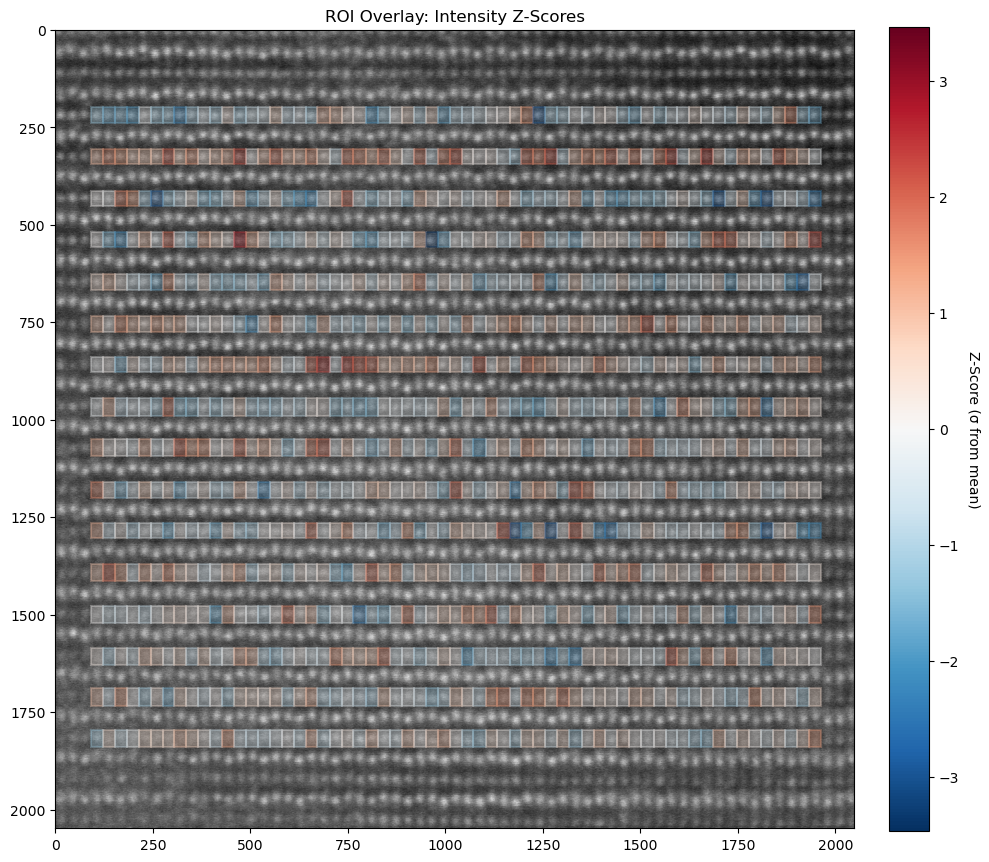

In [3]:
# dis = [0, 0, 1, -1]
# djs = [-1, 1, 0, 0]
# djs = [2*i for i in djs]

# dis = [-1, 0, 1, -1, 0, 1, -1, 0, 1]
# djs = [-1, -1, -1, 0, 0, 0, 1, 1, 1]
# djs = [2*i for i in djs]

dis = [-2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2]
djs = [-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
djs = [2*i for i in djs]

crop.set_nn_coords(dis, djs)
crop.get_nn_intensities()
crop.get_nn_displacements()
crop.get_atom_types()
crop.get_intensity_z_score_outliers(atom_type = 'Fe')
crop.plot_intensity_z_score_heatmap()

z_score_4sames = crop.intensity_from_vincinity_z_scores
indices_4sames = crop.intensity_from_vincinity_indices

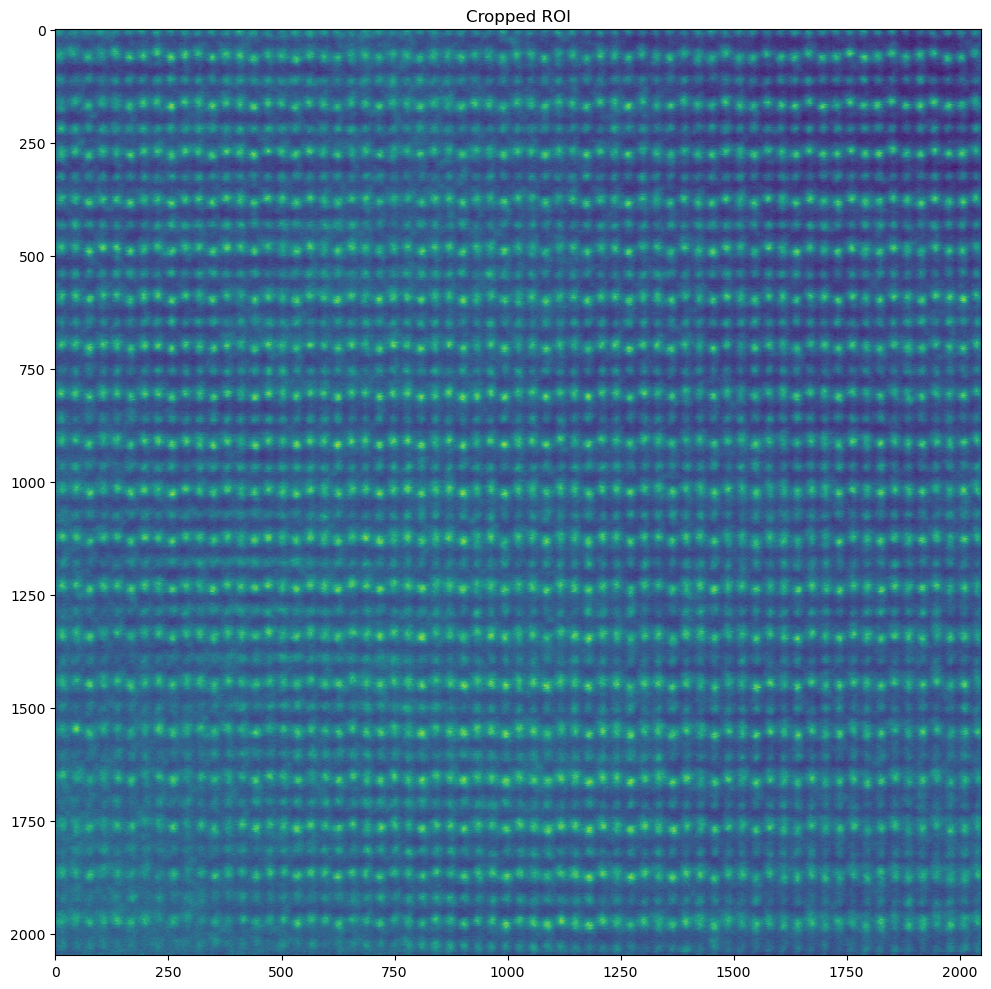

In [4]:
crop.plot_crop()

In [5]:
crop.grid[10, 6]

In [6]:
sum_diff = []
for idx_same, (i, j) in enumerate(indices_4sames):
    if (i, j) in indices_4diffs:
        idx_diff = indices_4diffs.index((i, j))
        sum_diff.append(np.abs(z_score_4sames[idx_same] - z_score_4diffs[idx_diff]))
np.mean(sum_diff)

0.48528937592113325